# Fitting empirical data using Gaussian Mixture Models

In this notebook we aim at studying the problem of estimating the underling probability distribution of a phenomenon given empirical observations. More precisely, given IID random variables $X_i \sim P_X$ with observations $\{x_1, ..., x_n\}$, we want to estimate from the observations: How many modes has $P$? If we approximate $P$ by a combination of Gaussian distributions, how many distributions we actually need to fit the data? Which are the optimal parameters of these Gaussian distributions? 

Refs:
* https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
* add the ref to the book

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import scipy.stats as stats
import math

### Create a toy example 

In [109]:
# === Set distribution parameters === #
k = 4  # number of Gaussians
sigma_0 = 1  # Set an order of magnitudo for the standard deviation
sigmas = sigma_0*np.random.random((k,))  # The std of each of the modes 
dist = .8*sigma_0 # min distance between the gaussians
means = -dist + np.cumsum(dist + dist*np.random.random((k,)))  # The mean of each gaussian will have a distance in [dist, 2*dist]
priors = np.random.random((k,))
priors /= priors.sum()  # normalized prior of each Gaussian

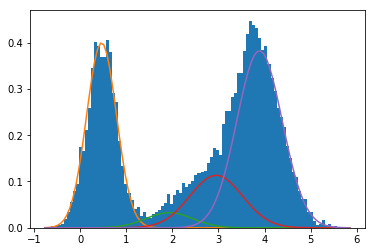

In [110]:
# === Sample empirical observations from P === # 
N = 10000  # approx number of observations
Ns = (N*priors).astype('int')
x = np.array([])
for i in range(k):
    new_x = np.random.normal(loc=means[i],scale=sigmas[i],size=(Ns[i],))
    x = np.append(x,new_x)

# Shuffle the data, 
np.random.shuffle(x)

if 1:
    plt.figure()
    plt.hist(x,bins=100, density=True)
    xx = np.linspace(x.min(), x.max(), 100)
    for i in range(k):
        plt.plot(xx, priors[i]*stats.norm.pdf(xx, means[i], sigmas[i]))

### Estimate the distributions using the data

In [144]:
# Split the data into 80% for fitting and 20% for testing
n = len(x)
x_fit = x[:int(.8*n)].reshape(-1,1)
x_eval = x[int(.8*n):].reshape(-1,1)

# ==== Set fitting parameters,  ===== #
k_e = k-0  # Set the number of gaussians 
# ----------------------------------- #

# Use "fit" partition to estimate the distribution of the data and evaluate the estimation on eval. 
gm = mixture.GaussianMixture(n_components=k_e, tol=0.001, reg_covar=1e-10, max_iter=100, 
                             n_init=1, init_params='kmeans', verbose=1, verbose_interval=10)

In [145]:
gm.fit(x_fit)
print('Score on fit/eval data: {}/{}'.format(gm.score(x_fit), gm.score(x_eval)))

Initialization 0
Initialization converged: True
Score on fit/eval data: -1.458799220771494/-1.4245620325893291


In [148]:
a = gm.get_params(deep=True)

In [149]:
a

{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 4,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-10,
 'tol': 0.001,
 'verbose': 1,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}